# Visualization of particles

## Import packages

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
%matplotlib inline

## Variables
Change these variables to change the settings for the animation

In [ ]:
save_video = True
fps = 20    # Frames per second
color = 'b'
dpi = 200   # Dots per inch (i.e. resolution)
# TODO: add option to set corners of the box.
# TODO: add option to change size of particles
filename = "test123.txt"    # Insert file name here (must be txt format)

## Data Extraction

In [52]:
simulation = []
with open(filename) as txtdata:
    for frame in txtdata.readlines():
        frame_arr = []
        for particle in frame.split('\t')[:-1]:
            frame_arr.append(np.array([coord for coord in particle.split(' ')][:-1], dtype=float))
        simulation.append(frame_arr)

simulation = np.array(simulation)
print(simulation.shape)

(100, 100, 3)


## Animation

saving video as MP4


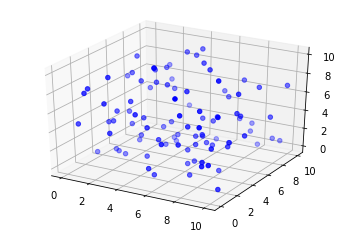

In [58]:
frames = []
fig = plt.figure()
ax = plt.axes(projection='3d')

for frame in simulation:
    scatter = ax.scatter(frame[:, 0], frame[:, 1], frame[:, 2], c=color, animated=True)
    frames.append([scatter])

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)
#ax.set_zlim(0, 10)
interval = 1/fps*1000
ani = animation.ArtistAnimation(fig, frames, interval=interval, blit=True, repeat=False)

if save_video:
    print("saving video as MP4")
    ani.save('results/moving_particles.mp4', dpi=dpi)

# Random data generator

In [50]:
with open(filename, 'w') as txt:
    for i in range(100):
        a = np.random.uniform(0, 10, size=(100, 3))
        for col in a:
            for i in col:
                txt.write(str(i) + " ")
            txt.write("\t")
        txt.write("\n")